___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Classification with ANN<br>

# Keras Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1


## Exploratory Data Analysis and Visualization

In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [6]:
df.describe(include='O')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


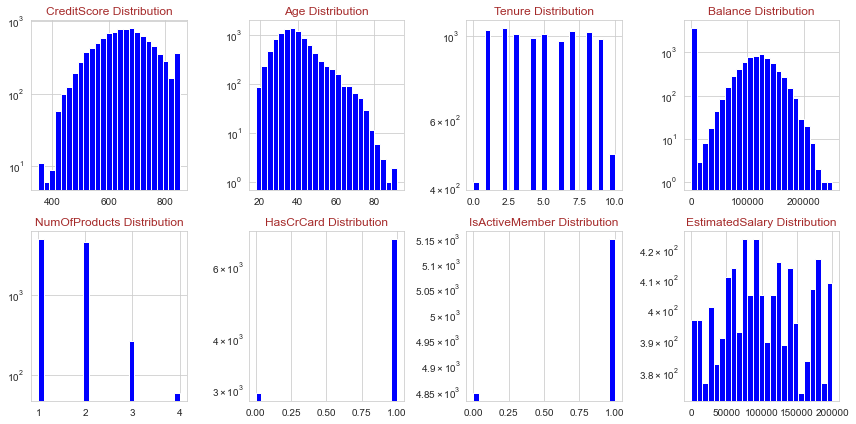

In [8]:
fig, axes = plt.subplots(2,4,figsize=(12,6))
feats = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
for i, ax in enumerate(axes.flatten()):
    ax.hist(df[feats[i]], bins=25, color='blue')
    ax.set_title(str(feats[i])+' Distribution', color='brown')
    ax.set_yscale('log')
plt.tight_layout()

In [9]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:xlabel='Exited', ylabel='count'>

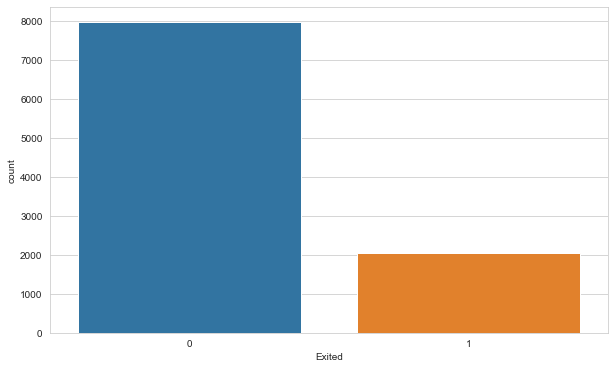

In [10]:
sns.countplot(df["Exited"])

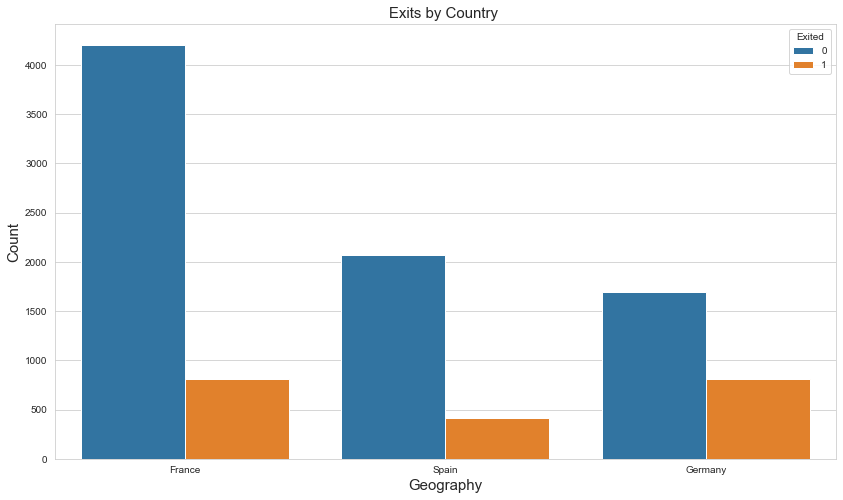

In [12]:
plt.figure(figsize=(14,8))
ax = sns.countplot(x="Geography", hue="Exited", data=df)
ax.set_xlabel("Geography",fontsize=15)  
ax.set_ylabel("Count",fontsize=15)
ax.set_title('Exits by Country ',fontsize=15)
plt.show()

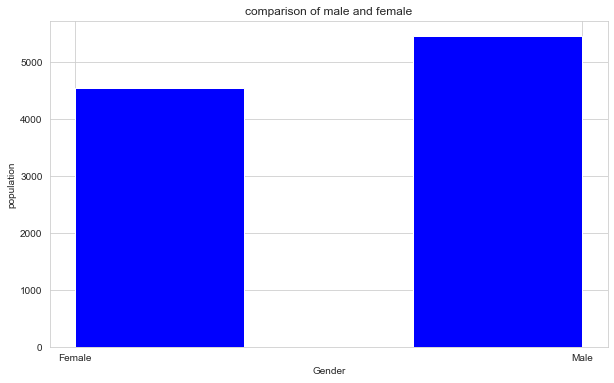

In [15]:
# Plotting the features of the dataset to see the correlation between them

plt.hist(x = df.Gender, bins = 3, color = 'blue')
plt.title('comparison of male and female')
plt.xlabel('Gender')
plt.ylabel('population')
plt.show()

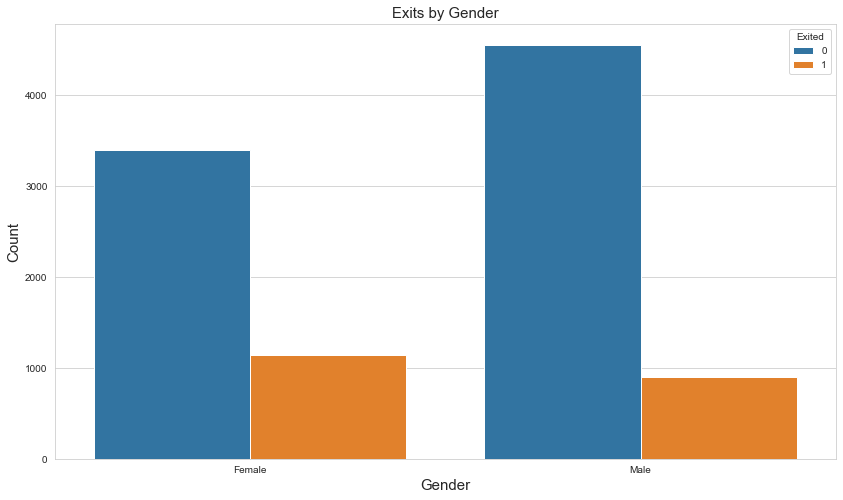

In [16]:
plt.figure(figsize=(14,8))
ax = sns.countplot(x="Gender", hue="Exited", data=df)
ax.set_xlabel("Gender",fontsize=15)  
ax.set_ylabel("Count",fontsize=15)
ax.set_title('Exits by Gender',fontsize=15)
plt.show()

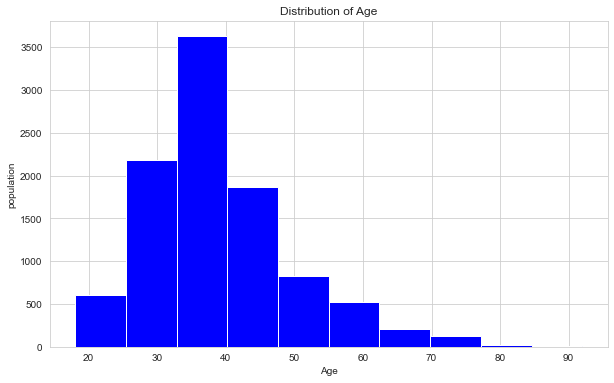

In [21]:
# comparison of age in the dataset

plt.hist(x = df.Age, bins = 10, color = 'blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('population')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Exited'>

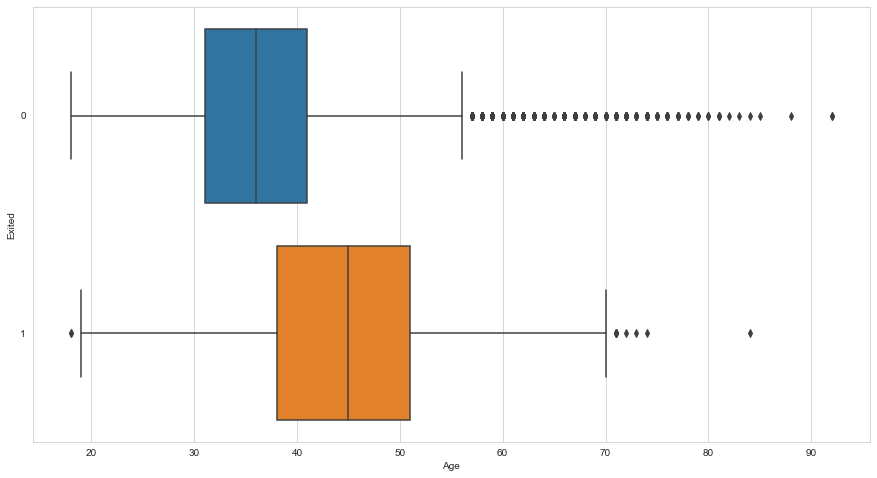

In [23]:
plt.figure(figsize=(15, 8))
sns.boxplot(x=df.Age, y=df.Exited, orient='h')

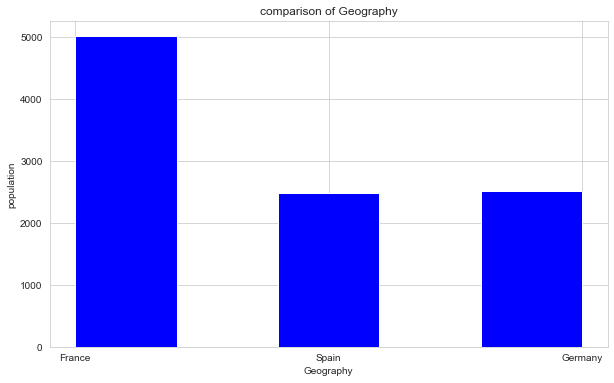

In [27]:
# comparison of geography

plt.hist(x = df.Geography, bins = 5, color = 'blue')
plt.title('comparison of Geography')
plt.xlabel('Geography')
plt.ylabel('population')
plt.show()

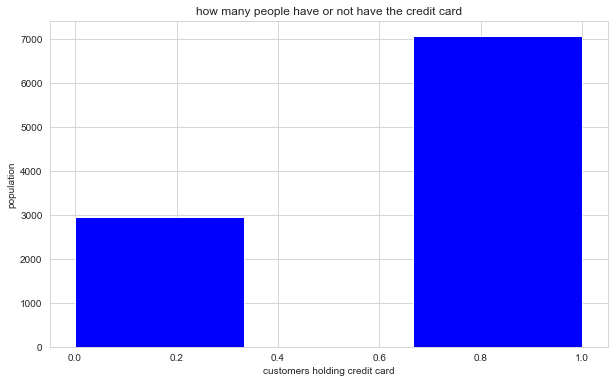

In [28]:
# comparision of how many customers hold the credit card

plt.hist(x = df.HasCrCard, bins = 3, color = 'blue')
plt.title('how many people have or not have the credit card')
plt.xlabel('customers holding credit card')
plt.ylabel('population')
plt.show()

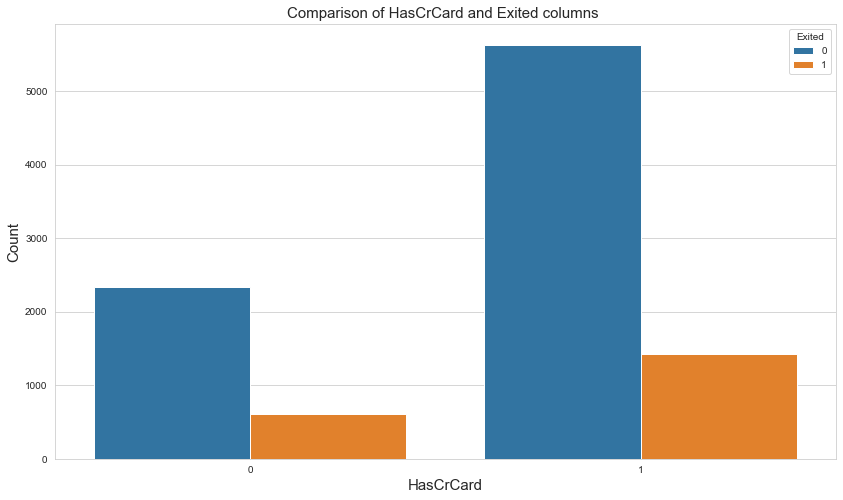

In [29]:
plt.figure(figsize=(14,8))
ax = sns.countplot(x="HasCrCard", hue="Exited", data=df)
ax.set_xlabel("HasCrCard",fontsize=15)  
ax.set_ylabel("Count",fontsize=15)
ax.set_title('Comparison of HasCrCard and Exited columns ',fontsize=15)
plt.show()

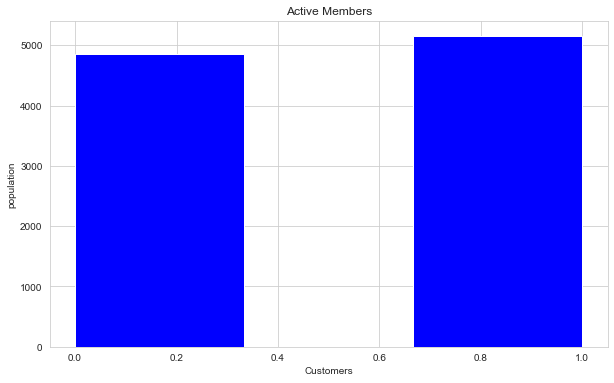

In [31]:
# How many active member does the bank have ?

plt.hist(x = df.IsActiveMember, bins = 3, color = 'blue')
plt.title('Active Members')
plt.xlabel('Customers')
plt.ylabel('population')
plt.show()

<AxesSubplot:xlabel='HasCrCard'>

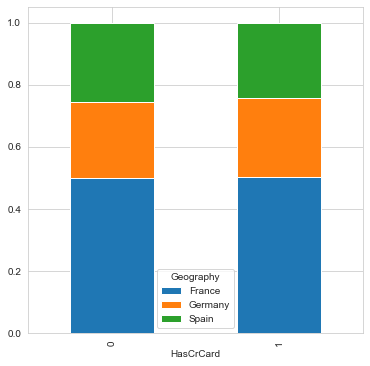

In [33]:
# comparison between geography and card holders

HasCrCard = pd.crosstab(df['HasCrCard'], df['Geography'])
HasCrCard.div(HasCrCard.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                            stacked = True,figsize = (6, 6))

<AxesSubplot:xlabel='IsActiveMember'>

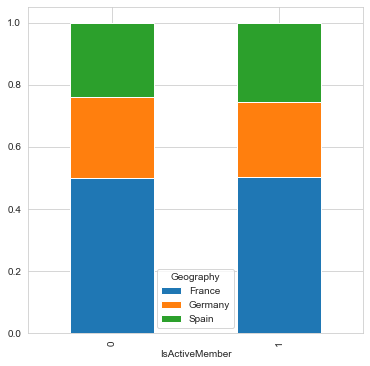

In [34]:
# comparison of active member in differnt geographies

IsActiveMember = pd.crosstab(df['IsActiveMember'], df['Geography'])
IsActiveMember.div(IsActiveMember.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                             stacked = True, figsize= (6, 6))

<AxesSubplot:xlabel='Age'>

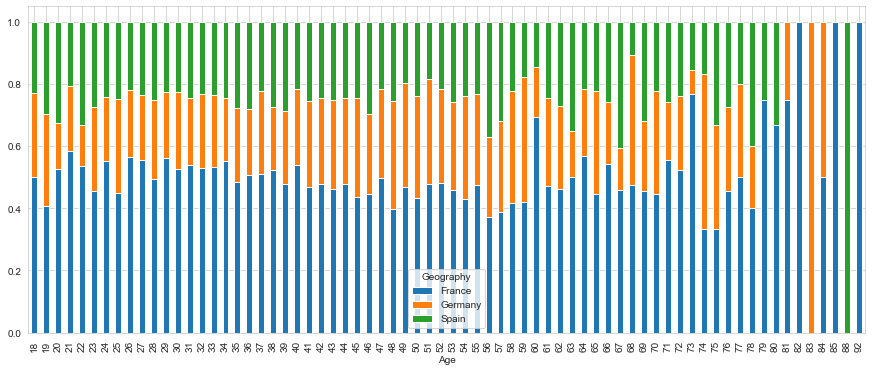

In [36]:
# comparing ages in different geographies

Age = pd.crosstab(df['Age'], df['Geography'])
Age.div(Age.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                           stacked = True, figsize = (15,6))

In [37]:
# calculating total balance in france, germany and spain

total_france = df.Balance[df.Geography == 'France'].sum()
total_germany = df.Balance[df.Geography == 'Germany'].sum()
total_spain = df.Balance[df.Geography == 'Spain'].sum()

print("Total Balance in France :",total_france)
print("Total Balance in Germany :",total_germany)
print("Total Balance in Spain :",total_spain)

Total Balance in France : 311332479.49
Total Balance in Germany : 300402861.38
Total Balance in Spain : 153123552.01


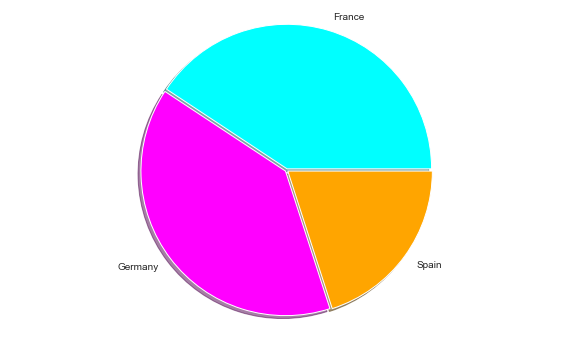

In [38]:
# plotting a pie chart of total balance

labels = 'France', 'Germany', 'Spain'
colors = ['cyan', 'magenta', 'orange']
sizes =  [311, 300, 153]
explode = [ 0.01, 0.01, 0.01]

plt.pie(sizes, colors = colors, labels = labels, explode = explode, shadow = True)

plt.axis('equal')
plt.show()

<AxesSubplot:xlabel='Balance', ylabel='Exited'>

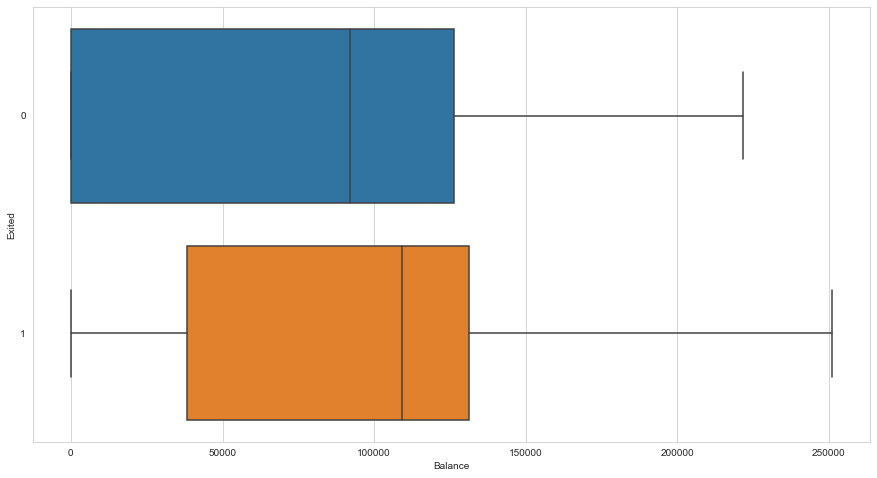

In [39]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Balance', y='Exited', data=df, orient='h')

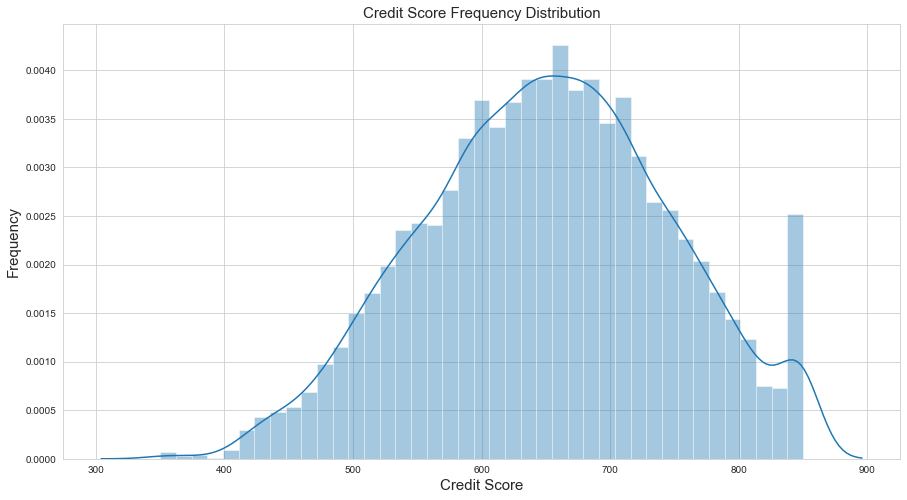

In [40]:
plt.figure(figsize=(15, 8))
sns.distplot(df.CreditScore)
plt.ylabel('Frequency', fontsize=15)
plt.xlabel('Credit Score', fontsize=15)
plt.title('Credit Score Frequency Distribution', fontsize=15)
plt.show()

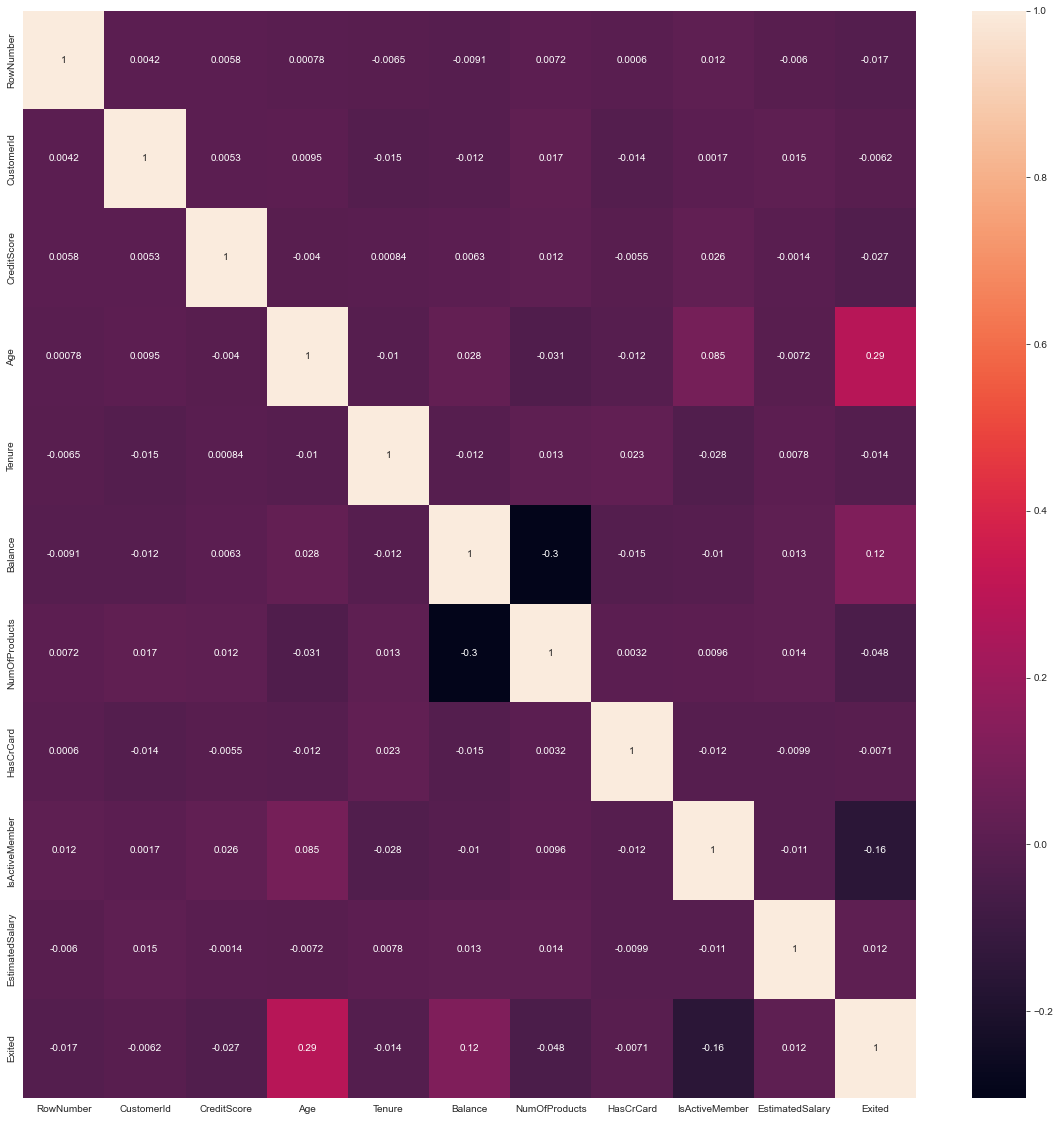

In [41]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);

In [42]:
df["Geography"].unique(),df["Gender"].unique(), df.NumOfProducts.unique(), df.HasCrCard.unique(), df.IsActiveMember.unique()

(array(['France', 'Spain', 'Germany'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array([1, 3, 2, 4], dtype=int64),
 array([1, 0], dtype=int64),
 array([1, 0], dtype=int64))

In [43]:
df = df.drop(['CustomerId','RowNumber','Surname'], axis = "columns")     # axis=1
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [44]:
df.shape

(10000, 11)

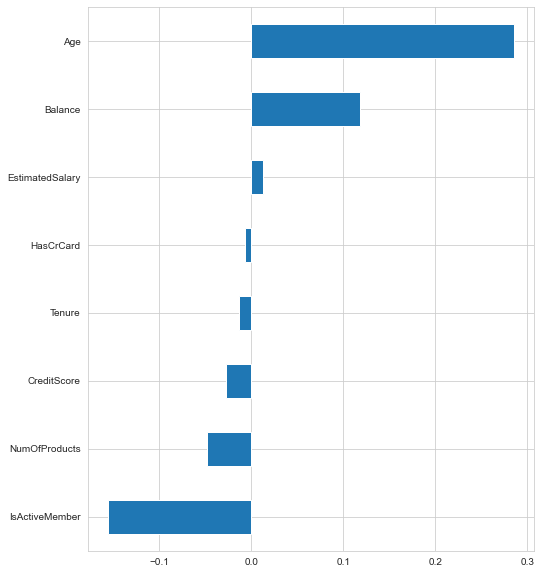

In [45]:
plt.figure(figsize = (8,10))
df.corr()['Exited'].sort_values().drop("Exited").plot(kind = "barh");

In [46]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [47]:
df = pd.get_dummies(df,columns = ['Geography'])

In [48]:
df.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
4787,529,0,42,1,157498.900,1,1,1,82276.620,0,1,0,0
4971,681,0,30,2,128393.290,1,1,1,180593.450,0,0,0,1
7213,484,1,55,8,149349.580,3,0,0,137519.920,1,0,1,0
8027,684,0,39,4,207034.960,2,0,0,157694.760,1,0,0,1
5840,616,0,71,4,0.000,2,1,1,173599.380,0,0,0,1


## Preprocessing of Data
- Train | Test Split, Scalling

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [17]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values

In [18]:
seed = 42

In [21]:
# SMOTE PREPERATION
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=seed)
X1, y1 = sm.fit_resample(X, y)
df2 = pd.concat([pd.DataFrame(X1), pd.Series(y1)], axis=1)
df2.columns = df.columns
df2.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.000,1,1,1,101348.880,1,0,0,1
1,608,1,41,1,83807.860,1,0,1,112542.580,0,0,1,0
2,502,1,42,8,159660.800,3,1,0,113931.570,1,0,0,1
3,699,1,39,1,0.000,2,0,0,93826.630,1,0,0,0
4,850,1,43,2,125510.820,1,1,1,79084.100,0,0,1,0


In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15926 entries, 0 to 15925
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        15926 non-null  int64  
 1   Gender             15926 non-null  int64  
 2   Age                15926 non-null  int64  
 3   Tenure             15926 non-null  int64  
 4   Balance            15926 non-null  float64
 5   NumOfProducts      15926 non-null  int64  
 6   HasCrCard          15926 non-null  int64  
 7   IsActiveMember     15926 non-null  int64  
 8   EstimatedSalary    15926 non-null  float64
 9   Exited             15926 non-null  uint8  
 10  Geography_France   15926 non-null  uint8  
 11  Geography_Germany  15926 non-null  uint8  
 12  Geography_Spain    15926 non-null  int64  
dtypes: float64(2), int64(8), uint8(3)
memory usage: 1.3 MB


## Modelling & Model Performance

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

## WITHOUT SMOTE

In [23]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.15, random_state = seed)

In [25]:
scaler = MinMaxScaler()

In [26]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
X_train.shape

(8500, 12)

In [29]:
X_test.shape

(1500, 12)

In [32]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(18, activation = "relu"))  
# model.add(Dropout(0.3))
model.add(Dense(9, activation = "relu"))
# model.add(Dropout(0.3))
model.add(Dense(1, activation = "sigmoid"))  # output binary olduğu için sigmoid 

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [33]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 100)

In [34]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 32, epochs = 300, verbose=1, callbacks = [early_stop])

Epoch 1/300
226/226 [==============================] - 6s 9ms/step - loss: 0.4901 - accuracy: 0.7956 - val_loss: 0.4682 - val_accuracy: 0.8008
Epoch 2/300
226/226 [==============================] - 1s 5ms/step - loss: 0.4625 - accuracy: 0.7978 - val_loss: 0.4542 - val_accuracy: 0.8118
Epoch 3/300
226/226 [==============================] - 1s 4ms/step - loss: 0.4490 - accuracy: 0.8065 - val_loss: 0.4436 - val_accuracy: 0.8173
Epoch 4/300
226/226 [==============================] - 1s 5ms/step - loss: 0.4379 - accuracy: 0.8113 - val_loss: 0.4343 - val_accuracy: 0.8212
Epoch 5/300
226/226 [==============================] - 1s 4ms/step - loss: 0.4269 - accuracy: 0.8156 - val_loss: 0.4253 - val_accuracy: 0.8227
Epoch 6/300
226/226 [==============================] - 1s 4ms/step - loss: 0.4192 - accuracy: 0.8173 - val_loss: 0.4195 - val_accuracy: 0.8275
Epoch 7/300
226/226 [==============================] - 1s 5ms/step - loss: 0.4113 - accuracy: 0.8183 - val_loss: 0.4110 - val_accuracy: 0.8251

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 18)                234       
                                                                 
 dense_4 (Dense)             (None, 9)                 171       
                                                                 
 dense_5 (Dense)             (None, 1)                 10        
                                                                 
Total params: 415
Trainable params: 415
Non-trainable params: 0
_________________________________________________________________


In [36]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.490,0.796,0.468,0.801
1,0.462,0.798,0.454,0.812
2,0.449,0.807,0.444,0.817
3,0.438,0.811,0.434,0.821
4,0.427,0.816,0.425,0.823


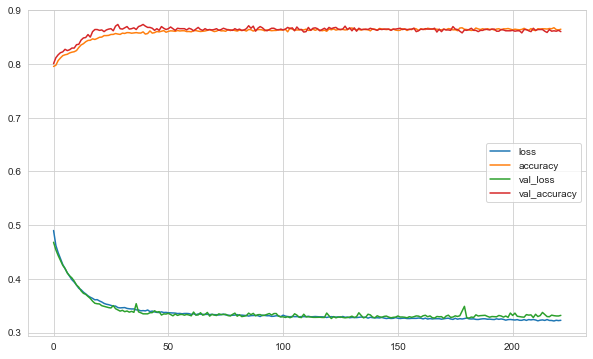

In [37]:
loss_df.plot();

In [38]:
model.evaluate(X_test, y_test, verbose=0)

[0.34708261489868164, 0.8573333621025085]

In [39]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.34708261489868164
accuracy :  0.8573333621025085


In [40]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")  
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1120   74]
 [ 140  166]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1194
           1       0.69      0.54      0.61       306

    accuracy                           0.86      1500
   macro avg       0.79      0.74      0.76      1500
weighted avg       0.85      0.86      0.85      1500



## WITHOUT SMOTE - WITH CLASS_WEIGHT

In [55]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.15, random_state = seed)
scaler = MinMaxScaler()

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
class_weights

array([0.62786231, 2.45522819])

In [58]:
tf.random.set_seed(seed)

model_w = Sequential()

model_w.add(Dense(18, activation = "relu"))  
# model_w.add(Dropout(0.3))
model_w.add(Dense(9, activation = "relu"))
# mode_wl.add(Dropout(0.3))
model_w.add(Dense(1, activation = "sigmoid"))  

opt = Adam(lr = 0.001)
model_w.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [59]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 100)

In [60]:
model_w.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 32, epochs = 300, verbose=1,
          callbacks = [early_stop], class_weight={0: 0.62787777, 1: 2.45499182})

Epoch 1/300
226/226 [==============================] - 5s 9ms/step - loss: 0.6792 - accuracy: 0.6836 - val_loss: 0.6190 - val_accuracy: 0.6596
Epoch 2/300
226/226 [==============================] - 1s 5ms/step - loss: 0.6265 - accuracy: 0.6525 - val_loss: 0.6024 - val_accuracy: 0.6722
Epoch 3/300
226/226 [==============================] - 1s 5ms/step - loss: 0.6101 - accuracy: 0.6703 - val_loss: 0.5914 - val_accuracy: 0.6894
Epoch 4/300
226/226 [==============================] - 1s 5ms/step - loss: 0.5985 - accuracy: 0.6896 - val_loss: 0.6286 - val_accuracy: 0.6541
Epoch 5/300
226/226 [==============================] - 1s 5ms/step - loss: 0.5864 - accuracy: 0.6949 - val_loss: 0.5837 - val_accuracy: 0.6941
Epoch 6/300
226/226 [==============================] - 1s 5ms/step - loss: 0.5770 - accuracy: 0.7132 - val_loss: 0.6187 - val_accuracy: 0.6659
Epoch 7/300
226/226 [==============================] - 1s 5ms/step - loss: 0.5676 - accuracy: 0.7165 - val_loss: 0.5773 - val_accuracy: 0.7067

In [61]:
model_w.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 18)                234       
                                                                 
 dense_10 (Dense)            (None, 9)                 171       
                                                                 
 dense_11 (Dense)            (None, 1)                 10        
                                                                 
Total params: 415
Trainable params: 415
Non-trainable params: 0
_________________________________________________________________


In [62]:
loss_df = pd.DataFrame(model_w.history.history)
loss_df.tail()

,loss,accuracy,val_loss,val_accuracy
295,0.438,0.800,0.500,0.750
296,0.439,0.799,0.506,0.745
297,0.439,0.800,0.466,0.769
298,0.437,0.798,0.403,0.824
299,0.438,0.798,0.485,0.755


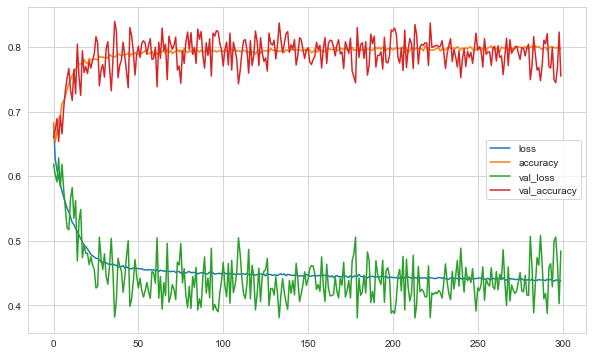

In [63]:
loss_df.plot();

In [64]:
model_w.evaluate(X_test, y_test, verbose=0)

[0.5236498117446899, 0.7306666374206543]

In [65]:
loss, accuracy = model_w.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.5236498117446899
accuracy :  0.7306666374206543


In [66]:
y_pred = (model_w.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[853 341]
 [ 63 243]]
              precision    recall  f1-score   support

           0       0.93      0.71      0.81      1194
           1       0.42      0.79      0.55       306

    accuracy                           0.73      1500
   macro avg       0.67      0.75      0.68      1500
weighted avg       0.83      0.73      0.75      1500



## WITH SMOTE  (NO ADDITIONAL CLASS_WEIGHT)

In [42]:
X = df2.drop('Exited', axis=1)
y = df2['Exited'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.15, random_state = seed)
scaler = MinMaxScaler()

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
X_train.shape

(13537, 12)

In [44]:
X_test.shape

(2389, 12)

In [45]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(18, activation = "relu"))  
# model.add(Dropout(0.3))
model.add(Dense(9, activation = "relu"))
# model.add(Dropout(0.3))
model.add(Dense(1, activation = "sigmoid"))  

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])


In [46]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 100)
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 32, epochs = 300, verbose=1, callbacks = [early_stop])

Epoch 1/300
360/360 [==============================] - 5s 6ms/step - loss: 0.4041 - accuracy: 0.8285 - val_loss: 0.2312 - val_accuracy: 0.9000
Epoch 2/300
360/360 [==============================] - 2s 4ms/step - loss: 0.2098 - accuracy: 0.8978 - val_loss: 0.1960 - val_accuracy: 0.8966
Epoch 3/300
360/360 [==============================] - 1s 4ms/step - loss: 0.1982 - accuracy: 0.8998 - val_loss: 0.1886 - val_accuracy: 0.9030
Epoch 4/300
360/360 [==============================] - 2s 4ms/step - loss: 0.1966 - accuracy: 0.8982 - val_loss: 0.1882 - val_accuracy: 0.9040
Epoch 5/300
360/360 [==============================] - 2s 5ms/step - loss: 0.1938 - accuracy: 0.8990 - val_loss: 0.1870 - val_accuracy: 0.9040
Epoch 6/300
360/360 [==============================] - 2s 5ms/step - loss: 0.1916 - accuracy: 0.9040 - val_loss: 0.1847 - val_accuracy: 0.9020
Epoch 7/300
360/360 [==============================] - 2s 5ms/step - loss: 0.1919 - accuracy: 0.9021 - val_loss: 0.1839 - val_accuracy: 0.9065

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 18)                234       
                                                                 
 dense_7 (Dense)             (None, 9)                 171       
                                                                 
 dense_8 (Dense)             (None, 1)                 10        
                                                                 
Total params: 415
Trainable params: 415
Non-trainable params: 0
_________________________________________________________________


In [48]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.404,0.829,0.231,0.900
1,0.210,0.898,0.196,0.897
2,0.198,0.900,0.189,0.903
3,0.197,0.898,0.188,0.904
4,0.194,0.899,0.187,0.904


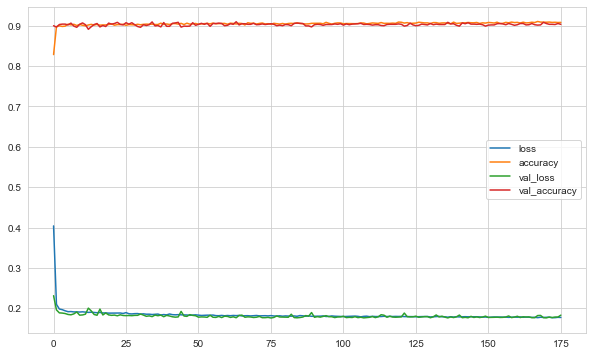

In [49]:
loss_df.plot();

In [50]:
model.evaluate(X_test, y_test, verbose=0)

[0.19109293818473816, 0.8982837796211243]

In [51]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.19109293818473816
accuracy :  0.8982837796211243


In [52]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")  
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1398   63]
 [ 180  748]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1461
           1       0.92      0.81      0.86       928

    accuracy                           0.90      2389
   macro avg       0.90      0.88      0.89      2389
weighted avg       0.90      0.90      0.90      2389



In [53]:
# model.predict(X_test)

array([[9.9982560e-01],
       [1.4866805e-01],
       [9.3000710e-02],
       ...,
       [7.7203532e-10],
       [5.4496431e-01],
       [9.9961680e-01]], dtype=float32)

In [ ]:
# model.predict(X_test)>0.5

## GridSearchCV FOR SMOTE OPTION

https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

In [72]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [73]:
X = df2.drop('Exited', axis=1)
y = df2['Exited'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.15, random_state = seed)
scaler = MinMaxScaler()

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
def build_classifier(optimizer, learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units = 18, activation = 'relu'))
    classifier.add(Dense(units = 9, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [75]:
early_stop = EarlyStopping(monitor = "val_accuracy", mode = "auto", verbose = 1, patience = 50)

In [76]:
tf.random.set_seed(seed)

classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.15, epochs = 250)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Nadam],
              'learn_rate': [0.001, 0.003]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 3,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Epoch 1/250
180/180 [==============================] - 1s 2ms/step - loss: 0.5008 - accuracy: 0.7739 - val_loss: 0.3344 - val_accuracy: 0.9010
Epoch 2/250
180/180 [==============================] - 0s 2ms/step - loss: 0.2588 - accuracy: 0.8981 - val_loss: 0.2100 - val_accuracy: 0.8996
Epoch 3/250
180/180 [==============================] - 0s 1ms/step - loss: 0.2073 - accuracy: 0.9003 - val_loss: 0.1955 - val_accuracy: 0.9015
Epoch 4/250
180/180 [==============================] - 0s 1ms/step - loss: 0.2010 - accuracy: 0.8974 - val_loss: 0.1928 - val_accuracy: 0.9015
Epoch 5/250
180/180 [==============================] - 0s 941us/step - loss: 0.1968 - accuracy: 0.8995 - val_loss: 0.1894 - val_accuracy: 0.9025
Epoch 6/250
180/180 [==============================] - 0s 906us/step - loss: 0.1946 - accuracy: 0.9014 - val_loss: 0.1921 - val_accuracy: 0.8951
Epoch 7/250
180/180 [==============================] - 0s 1ms/step - loss: 0.

GridSearchCV(cv=3,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000001375E5A6A30>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64], 'learn_rate': [0.001, 0.003],
                         'optimizer': [<class 'keras.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizer_v2.nadam.Nadam'>]},
             scoring='accuracy', verbose=1)

In [77]:
grid_model.best_score_

0.9038932020132018

In [78]:
grid_model.best_params_

{'batch_size': 64,
 'learn_rate': 0.001,
 'optimizer': keras.optimizer_v2.adam.Adam}

In [77]:
# grid_model.cv_results_

In [79]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]]
grid_result.sort_values(by='rank_test_score')

,mean_test_score,std_test_score,rank_test_score,params
6,0.904,0.002,1,"{'batch_size': 64, 'learn_rate': 0.001, 'optim..."
3,0.904,0.002,2,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
4,0.903,0.003,3,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
2,0.903,0.001,4,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
8,0.903,0.002,5,"{'batch_size': 64, 'learn_rate': 0.001, 'optim..."
1,0.903,0.001,6,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
9,0.903,0.000,7,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
11,0.903,0.002,8,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
10,0.902,0.002,9,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
0,0.901,0.005,10,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."


Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

## ROC (Receiver Operating Curve) and AUC (Area Under Curve) for grid_model

### for keras models

In [81]:
#plot_roc_curve(model, X_test, y_test); # it gives an error because of the Sequential model

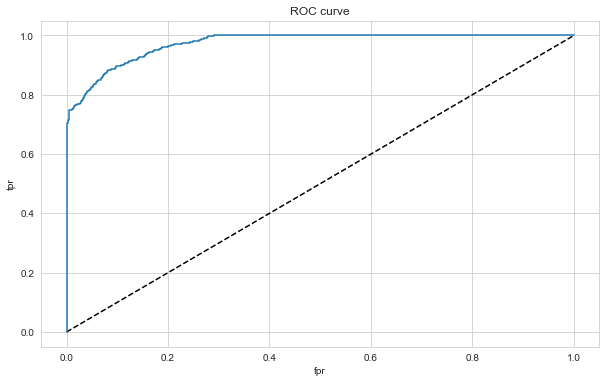

In [92]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [81]:
roc_auc_score(y_test, y_pred_proba)

0.8874693171894547

### for gridsearchcv model

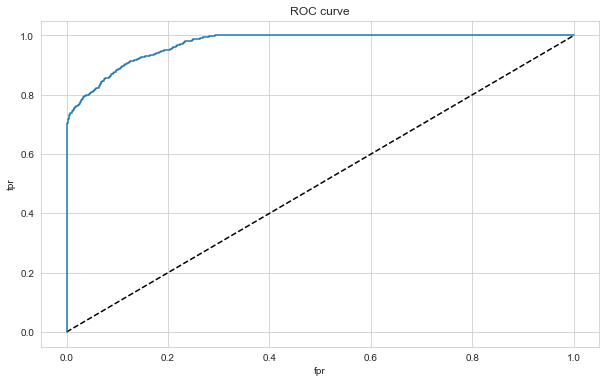

In [82]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]       
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [83]:
roc_auc_score(y_test, y_pred_proba)

0.9713646770044135

## Saving Final Model and Scaler

In [85]:
X = df2.drop('Exited', axis=1)
y = df2['Exited'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.15, random_state = seed)
scaler = MinMaxScaler()

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [84]:
import pickle
pickle.dump(scaler, open("Churn_Modelling", 'wb'))

In [86]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [100]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 50)

In [88]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 64, epochs = 300, verbose = 1,
          callbacks = [early_stop])

Epoch 1/300
212/212 [==============================] - 1s 2ms/step - loss: 0.4750 - accuracy: 0.7902 - val_loss: 0.3015 - val_accuracy: 0.8970
Epoch 2/300
212/212 [==============================] - 0s 1ms/step - loss: 0.2448 - accuracy: 0.8978 - val_loss: 0.2137 - val_accuracy: 0.8924
Epoch 3/300
212/212 [==============================] - 0s 1ms/step - loss: 0.2067 - accuracy: 0.9001 - val_loss: 0.2007 - val_accuracy: 0.8970
Epoch 4/300
212/212 [==============================] - 0s 1ms/step - loss: 0.1984 - accuracy: 0.9009 - val_loss: 0.1976 - val_accuracy: 0.9021
Epoch 5/300
212/212 [==============================] - 0s 1ms/step - loss: 0.1953 - accuracy: 0.9000 - val_loss: 0.1941 - val_accuracy: 0.8958
Epoch 6/300
212/212 [==============================] - 0s 1ms/step - loss: 0.1938 - accuracy: 0.8996 - val_loss: 0.1940 - val_accuracy: 0.9016
Epoch 7/300
212/212 [==============================] - 0s 1ms/step - loss: 0.1931 - accuracy: 0.9002 - val_loss: 0.1933 - val_accuracy: 0.9004

<AxesSubplot:>

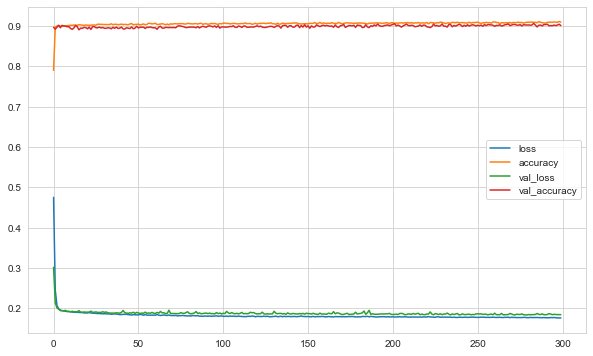

In [89]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [94]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.18602310121059418
accuracy :  0.9037253856658936


In [95]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1362   99]
 [ 131  797]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1461
           1       0.89      0.86      0.87       928

    accuracy                           0.90      2389
   macro avg       0.90      0.90      0.90      2389
weighted avg       0.90      0.90      0.90      2389



In [108]:
model.save('Churn_Modelling.h5')

## Loading Model and Scaler

In [109]:
from tensorflow.keras.models import load_model

In [110]:
model_churn = load_model('Churn_Modelling.h5')
scaler_churn = pickle.load(open("Churn_Modelling", "rb"))

## Prediction_1

In [111]:
single_churn = df.drop('Exited', axis = 1).iloc[0:1, :]
single_churn

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.000,1,1,1,101348.880,1,0,0


In [112]:
single_churn = scaler_churn.transform(single_churn)
single_churn

array([[0.538     , 1.        , 0.32432432, 0.2       , 0.        ,
        0.        , 1.        , 1.        , 0.50673489, 1.        ,
        0.        , 0.        ]])

In [113]:
(model_churn.predict(single_churn) > 0.5).astype("int32")

array([[0]])

In [114]:
model_churn.predict(single_churn)

array([[4.906767e-13]], dtype=float32)

In [115]:
df["Exited"].iloc[0]

1

## Comparison with ML

### Logistic Regression

In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
log_model=LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[764  32]
 [167  37]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.88       796
           1       0.54      0.18      0.27       204

    accuracy                           0.80      1000
   macro avg       0.68      0.57      0.58      1000
weighted avg       0.76      0.80      0.76      1000



### Random Forest

In [115]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[763  33]
 [114  90]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.73      0.44      0.55       204

    accuracy                           0.85      1000
   macro avg       0.80      0.70      0.73      1000
weighted avg       0.84      0.85      0.84      1000

